<a href="https://colab.research.google.com/github/bskarthik05/Task_1/blob/main/Titanic_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [32]:
df = pd.read_csv('/content/sample_data/Titanic-Dataset.csv')

In [33]:
print("--- Initial Data Info ---")
df.info()

--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
print("--- Missing Values Before Handling ---")
print(df.isnull().sum())

--- Missing Values Before Handling ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [35]:
print("--- First 5 Rows ---")
print(df.head())

--- First 5 Rows ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

 Handle missing values

In [36]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-36-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [37]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-37-808ebb813aa0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [38]:
# This column has too many missing values
# we will drop the 'Cabin' column.
df.drop('Cabin', axis=1, inplace=True)

In [39]:
print("--- Missing Values After Handling ---")
print(df.isnull().sum())

--- Missing Values After Handling ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Convert categorical features into numerical using encoding

In [40]:
# Use Label Encoding
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [41]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [42]:
print("--- Data Types After Encoding ---")
print(df.info())

--- Data Types After Encoding ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(2)
memory usage: 71.5+ KB
None


In [43]:
print("--- First 5 Rows After Encoding ---")
print(df.head())

--- First 5 Rows After Encoding ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False

Normalize/Standardize the numerical features

In [44]:
# Features to scale: 'Age', 'Fare', 'SibSp', 'Parch'
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [45]:
print("--- First 5 Rows After Scaling Numerical Features ---")
print(df.head())

--- First 5 Rows After Scaling Numerical Features ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age     SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.565736  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861  0.432793   
2                             Heikkinen, Miss. Laina    0 -0.258337 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312  0.432793   
4                           Allen, Mr. William Henry    1  0.433312 -0.474545   

      Parch            Ticket      Fare  Embarked_Q  Embarked_S  
0 -0.473674         A/5 21171 -0.502445       False        True  
1 -0.473674          PC 17599  0.786845       False       False  
2 -0.473674  STON/O2. 3101282 -0.488854     

Visualize outliers using boxplots

In [46]:
# We'll visualize for 'Age' and 'Fare'
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Boxplot of Age')

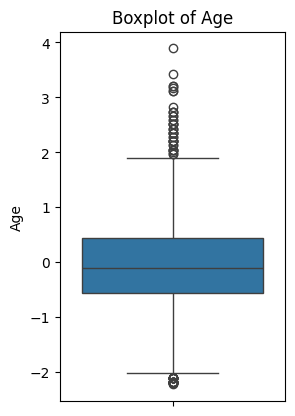

In [47]:
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

Text(0.5, 1.0, 'Boxplot of Fare')

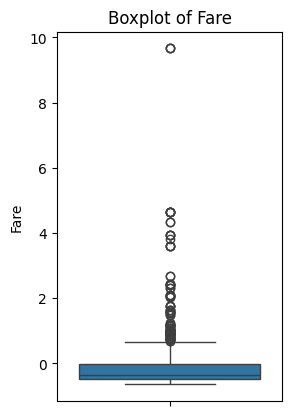

In [48]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare')

In [49]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [50]:
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

In [51]:
print(f"\n--- Outlier Detection for Fare ---")
print(f"Lower Bound (Fare): {lower_bound_fare}")
print(f"Upper Bound (Fare): {upper_bound_fare}")
print(f"Number of outliers in Fare: {df[(df['Fare'] < lower_bound_fare) | (df['Fare'] > upper_bound_fare)].shape[0]}")


--- Outlier Detection for Fare ---
Lower Bound (Fare): -1.18650103391317
Upper Bound (Fare): 0.6731064591401562
Number of outliers in Fare: 116


In [52]:
df_cleaned = df[(df['Fare'] >= lower_bound_fare) & (df['Fare'] <= upper_bound_fare)]
print(f"Shape after removing Fare outliers: {df_cleaned.shape}")

Shape after removing Fare outliers: (775, 12)


In [53]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [54]:
print("--- Final Cleaned Data Info ---")
df.info()

--- Final Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    float64
 6   Parch        891 non-null    float64
 7   Fare         891 non-null    float64
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(4), int64(4)
memory usage: 57.6 KB


In [55]:
print("--- First 5 Rows of Final Cleaned Data ---")
print(df.head())

--- First 5 Rows of Final Cleaned Data ---
   PassengerId  Survived  Pclass  Sex       Age     SibSp     Parch      Fare  \
0            1         0       3    1 -0.565736  0.432793 -0.473674 -0.502445   
1            2         1       1    0  0.663861  0.432793 -0.473674  0.786845   
2            3         1       3    0 -0.258337 -0.474545 -0.473674 -0.488854   
3            4         1       1    0  0.433312  0.432793 -0.473674  0.420730   
4            5         0       3    1  0.433312 -0.474545 -0.473674 -0.486337   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  
